#                                                              Exploring Assumptions

#### parametric tests:

Parametric statistics is a branch of statistics which assumes that sample data come from a population that can be adequately modeled by a probability distribution that has a fixed set of parameters. 

The assumptions of parametric tests are:

1. Normally distributed data

2. Homogeneity  of  variance

3. Interval or Ratio data

4. Independence

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/home/atrides/Desktop/More_Stats/DownloadFestival.csv')

In [3]:
data.head()

,ticknumb,gender,day1,day2,day3
0,2111,Male,2.64,1.35,1.61
1,2229,Female,0.97,1.41,0.29
2,2338,Male,0.84,,
3,2384,Female,3.03,,
4,2401,Female,0.88,0.08,


In [4]:
day1 = data.copy()
day2 = data.copy()
day3 = data.copy()

In [5]:
day2 = day2[day2['day2']!=' ']
day3 = day3[day3['day3']!=' ']

In [6]:
day1['day1'].describe()

count    810.000000
mean       1.771136
std        0.693539
min        0.020000
25%        1.312500
50%        1.790000
75%        2.230000
max        3.690000
Name: day1, dtype: float64

In [7]:
day1['theoritical_normal'] = np.random.normal(1.771136, 0.693539, 810)

In [8]:
day2['day2']=pd.to_numeric(day2['day2'])

In [9]:
day2['day2'].describe()

count    264.000000
mean       0.960909
std        0.720780
min        0.000000
25%        0.410000
50%        0.790000
75%        1.350000
max        3.440000
Name: day2, dtype: float64

In [10]:
day2['theoritical_normal'] = np.random.normal( 0.960909, 0.720780, 264)

In [11]:
day3['day3']=pd.to_numeric(day3['day3'])
day3['day3'].describe()

count    123.000000
mean       0.976504
std        0.710277
min        0.020000
25%        0.440000
50%        0.760000
75%        1.525000
max        3.410000
Name: day3, dtype: float64

In [12]:
day3['theoritical_normal'] = np.random.normal(0.976504,0.710277, 123)

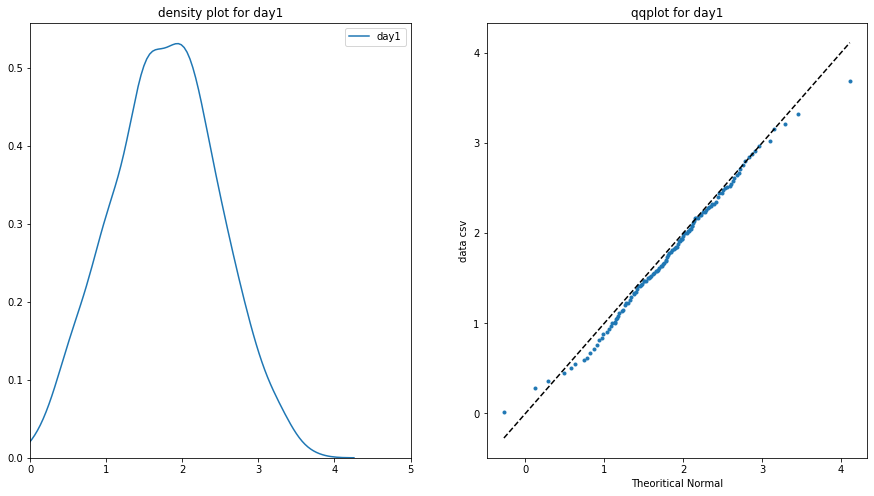

In [13]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(day1['day1'])
ax1.set_xlim([0,5])
ax1.set_title('density plot for day1')


percs = np.linspace(0,100,123)
qn_b = np.percentile(day1['day1'], percs)
qn_a = np.percentile(day1['theoritical_normal'], percs)


ax2 = plt.subplot(1,2,2)
plt.plot(qn_a,qn_b, ls="", marker=".")
ax2 = plt.gca()
ax2.set_xlabel('Theoritical Normal')
ax2.set_ylabel('data csv')
ax2.set_title('qqplot for day1')
x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()



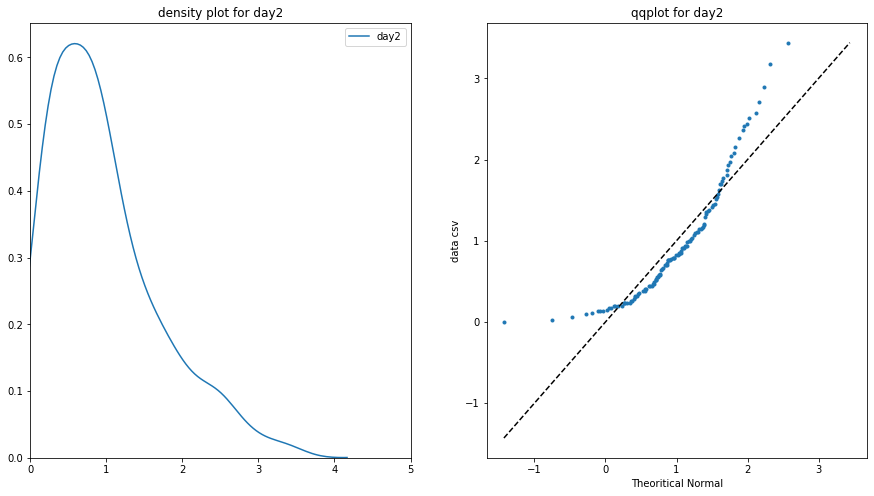

In [14]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(day2['day2'])
ax1.set_xlim([0,5])
ax1.set_title('density plot for day2')


percs = np.linspace(0,100,123)
qn_b = np.percentile(day2['day2'], percs)
qn_a = np.percentile(day2['theoritical_normal'], percs)


ax2 = plt.subplot(1,2,2)
plt.plot(qn_a,qn_b, ls="", marker=".")
ax2 = plt.gca()
ax2.set_xlabel('Theoritical Normal')
ax2.set_ylabel('data csv')
ax2.set_title('qqplot for day2')
x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()


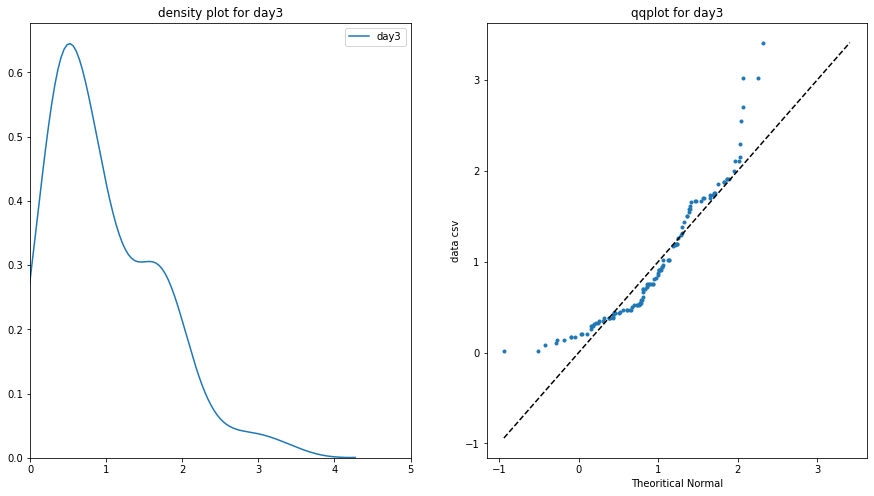

In [15]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(day3['day3'])
ax1.set_xlim([0,5])
ax1.set_title('density plot for day3')


percs = np.linspace(0,100,123)
qn_b = np.percentile(day3['day3'], percs)
qn_a = np.percentile(day3['theoritical_normal'], percs)


ax2 = plt.subplot(1,2,2)
plt.plot(qn_a,qn_b, ls="", marker=".")
ax2 = plt.gca()
ax2.set_xlabel('Theoritical Normal')
ax2.set_ylabel('data csv')
ax2.set_title('qqplot for day3')
x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

In [16]:
import scipy.stats as sp

In [17]:
sp.describe(day3['day3'])

DescribeResult(nobs=123, minmax=(0.02, 3.41), mean=0.9765040650406502, variance=0.5044934159669465, skewness=1.0202292321949304, kurtosis=0.6537138945078094)

In [18]:
# standard error for means
sp.sem(day3['day3'])

0.06404352026189808

In [19]:
# standard error for mean : std/sqrt(num of count)
day3['day3'].std()/np.sqrt(len(day3))

0.06404352026189808

In [20]:
# Shapiro–Wilk test of normality
sp.shapiro(day1['day1'])

(0.9959153532981873, 0.031990896910429)

# the important library used in this notebook is scipy.stats, seaborn, numpy

## some important function used in this notebook are :

i) scipy.stats.decribe()


ii)scipy.stats.kurtosis()


iii)scipy.stats.shapiro()


iv) numpy percentile()


v) sns kdeplot()



### Shapiro-wilks statistical test

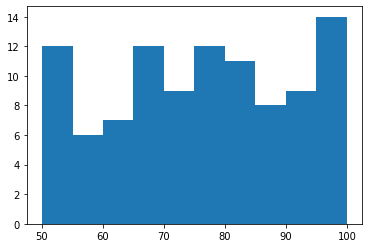

In [21]:
# let's check normality test for a uniform distribution
uni_dist = np.random.uniform(50,100, 100)
_ = plt.hist(uni_dist)

In [22]:
sp.shapiro(uni_dist)

(0.9494973421096802, 0.0007688011974096298)

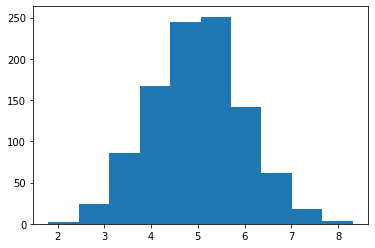

In [23]:
# let's check normality test for a normal distribution
nor_dist = np.random.normal(5,1, 1000)
_ = plt.hist(nor_dist)

In [24]:
sp.shapiro(nor_dist)

(0.9983158707618713, 0.440656840801239)

### Exploring groups of data

In [25]:
university_data = pd.read_csv('/home/atrides/Desktop/More_Stats/RExam.csv')

In [26]:
university_data.head()

,exam,computer,lectures,numeracy,uni
0,18,54,75.0,7,0
1,30,47,8.5,1,0
2,40,58,69.5,6,0
3,30,37,67.0,6,0
4,40,53,44.5,2,0


In [27]:
university_data['uni_name']='a'

In [28]:
for i in range(len(university_data)):
    if university_data.iloc[i]['uni']==0:
        university_data.loc[i, 'uni_name'] = 'Duncetown'
    else:
        university_data.loc[i, 'uni_name'] = 'sussex'

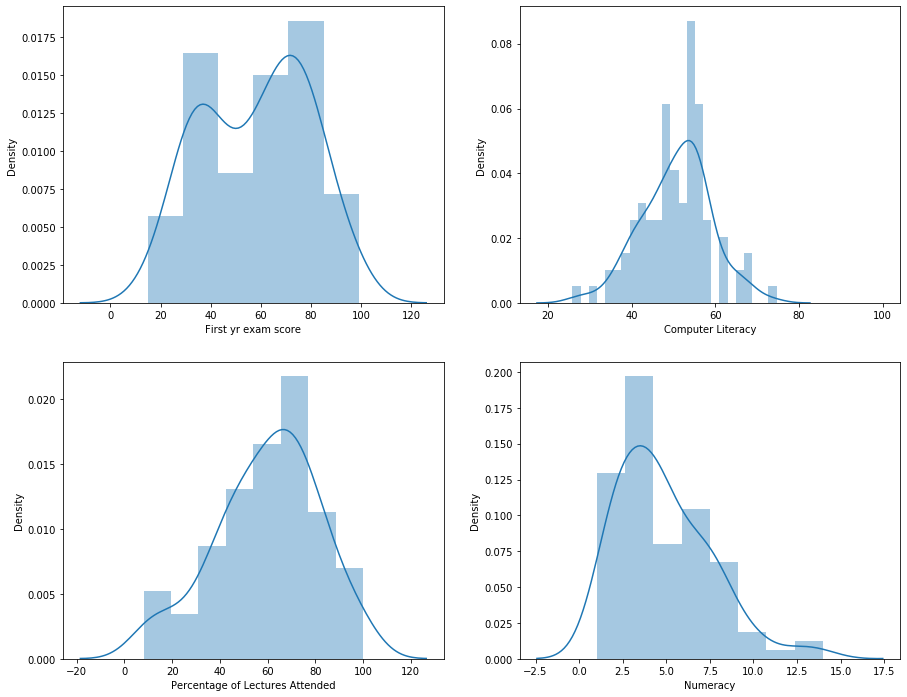

In [29]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(2,2,1)
sns.distplot(university_data['exam'],norm_hist=True)
ax1.set_xlabel('First yr exam score')
ax1.set_ylabel('Density')

ax2 = plt.subplot(2,2,2)
sns.distplot(university_data['computer'],norm_hist=True,bins=np.linspace(20,100,42))
ax2.set_xlabel('Computer Literacy')
ax2.set_ylabel('Density')



ax3 = plt.subplot(2,2,3)
sns.distplot(university_data['lectures'],norm_hist=True)
ax3.set_xlabel('Percentage of Lectures Attended')
ax3.set_ylabel('Density')

ax4 = plt.subplot(2,2,4)
sns.distplot(university_data['numeracy'],norm_hist=True)
ax4.set_xlabel('Numeracy')
ax4.set_ylabel('Density')
               
plt.show()

In [30]:
day1['day1']

0      2.64
1      0.97
2      0.84
3      3.03
4      0.88
       ... 
805    2.91
806    2.61
807    1.47
808    1.28
809    1.26
Name: day1, Length: 810, dtype: float64

In [31]:
x_avg = day1['day1'].mean()

In [32]:
l=[]
for i in day1['day1']:
    l.append((x_avg-i)**4)
num1 = sum(l)*810
num1

391385.4605456531

In [33]:
m=[]
for i in day1['day1']:
    m.append((x_avg-i)**2)
den1 = sum(m)**2
den1

151419.00890270222

In [34]:
K = num1/den1-3
K

-0.4152158082269124

In [35]:
sp.kurtosis(day1['day1'])

-0.41521580822691284

In [36]:
np.sqrt(6/264)

0.15075567228888181

In [37]:
np.sqrt(24/264)

0.30151134457776363

In [38]:
sp.describe(day2['day2'])

DescribeResult(nobs=264, minmax=(0.0, 3.44), mean=0.960909090909091, variance=0.519523885240235, skewness=1.0889928045068633, kurtosis=0.7840744644581563)

In [39]:
1.08/(0.3)

3.6000000000000005

In [40]:
sp.describe(day1['day1'])

DescribeResult(nobs=810, minmax=(0.02, 3.69), mean=1.7711358024691357, variance=0.48099623617024523, skewness=-0.00443656365418462, kurtosis=-0.41521580822691284)

In [41]:
se_kurtosis_day1 = np.sqrt(24/810)

In [42]:
kurtosis_2e = -0.415216/(2*se_kurtosis_day1)
kurtosis_2e

-1.206093489809144

### Analysis of Skewness and Kurtosis

Since the skewness and kurtosis of the normal distribution are zero, values for these two parameters should be close to zero for data to follow a normal distribution.

    A rough measure of the standard error of the skewness is np.sqrt(6/n) where n is the sample size.
    A rough measure of the standard error of the kurtosis is np.sqrt(24/n) where n is the sample size.


In [43]:
university_data.describe()

,exam,computer,lectures,numeracy,uni
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,58.10000,50.710000,59.765000,4.850000,0.500000
std,21.31557,8.260035,21.684777,2.705681,0.502519
min,15.00000,27.000000,8.000000,1.000000,0.000000
25%,38.00000,45.750000,46.375000,3.000000,0.000000
50%,60.00000,51.500000,62.000000,4.000000,0.500000
75%,75.00000,56.000000,74.625000,7.000000,1.000000
max,99.00000,73.000000,100.000000,14.000000,1.000000


In [44]:
for i in university_data.columns[:-2]:
    print(sp.describe(university_data[i]))

DescribeResult(nobs=100, minmax=(15, 99), mean=58.1, variance=454.35353535353534, skewness=-0.10538101836838216, kurtosis=-1.1100484227532972)
DescribeResult(nobs=100, minmax=(27, 73), mean=50.71, variance=68.22818181818182, skewness=-0.17163519579063727, kurtosis=0.28622083702835166)
DescribeResult(nobs=100, minmax=(8.0, 100.0), mean=59.765, variance=470.2295707070709, skewness=-0.4160703668364525, kurtosis=-0.2295027824471978)
DescribeResult(nobs=100, minmax=(1, 14), mean=4.85, variance=7.320707070707071, skewness=0.9468828141246891, kurtosis=0.8399068513473207)


In [45]:
stats_df =pd.DataFrame({'nobs': [100,100,100,100, ], 'mean': [58.1, 50.71, 59.765, 4.85], 'skew':[-0.10538101836838216,-0.17163519579063727, -0.4160703668364525 ,0.9468828141246891], 'kurtosis': [-1.1100484227532972,0.28622083702835166,-0.2295027824471978,0.8399068513473207 ]})

In [46]:
stats_df

,nobs,mean,skew,kurtosis
0,100,58.100,-0.105381,-1.110048
1,100,50.710,-0.171635,0.286221
2,100,59.765,-0.416070,-0.229503
3,100,4.850,0.946883,0.839907


In [47]:
stats_df['sig_skew'] = stats_df['skew']/(np.sqrt(6/100))

In [48]:
stats_df['sig_kurt'] = stats_df['kurtosis']/(np.sqrt(24/100))

In [49]:
stats_df

,nobs,mean,skew,kurtosis,sig_skew,sig_kurt
0,100,58.100,-0.105381,-1.110048,-0.430216,-2.265877
1,100,50.710,-0.171635,0.286221,-0.700698,0.584246
2,100,59.765,-0.416070,-0.229503,-1.698600,-0.468471
3,100,4.850,0.946883,0.839907,3.865633,1.714453


In [50]:
Dunce_data = university_data[university_data['uni']==0]
sussex_data = university_data[university_data['uni']==1]

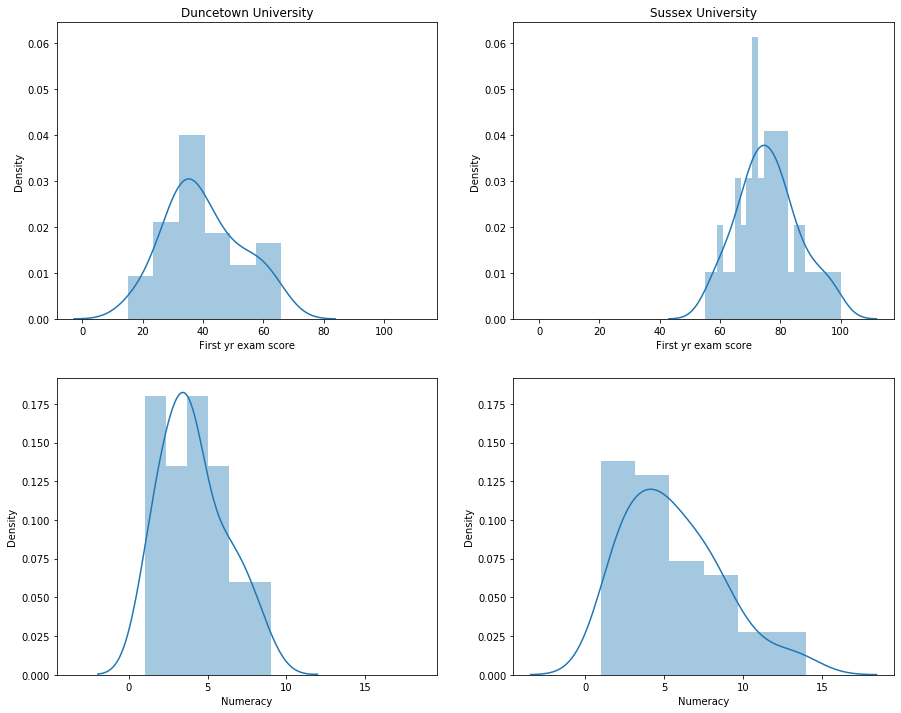

In [51]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(2,2,1)
sns.distplot(Dunce_data['exam'],norm_hist=True)
ax1.set_xlabel('First yr exam score')
ax1.set_ylabel('Density')
ax1.set_title('Duncetown University')

ax2 = plt.subplot(2,2,2,sharey=ax1,sharex=ax1)
sns.distplot(sussex_data['exam'],norm_hist=True,bins=np.linspace(20,100,42))
ax2.set_xlabel('First yr exam score')
ax2.set_ylabel('Density')
ax2.set_title('Sussex University')



ax3 = plt.subplot(2,2,3)
sns.distplot(Dunce_data['numeracy'],norm_hist=True)
ax3.set_xlabel('Numeracy')
ax3.set_ylabel('Density')

ax4 = plt.subplot(2,2,4,sharex=ax3, sharey=ax3)
sns.distplot(sussex_data['numeracy'],norm_hist=True)
ax4.set_xlabel('Numeracy')
ax4.set_ylabel('Density')
               
plt.show()

In [52]:
print(Dunce_data[['exam', 'numeracy']].describe())
print(sussex_data[['exam', 'numeracy']].describe())

            exam   numeracy
count  50.000000  50.000000
mean   40.180000   4.120000
std    12.588771   2.066645
min    15.000000   1.000000
25%    31.250000   3.000000
50%    38.000000   4.000000
75%    47.750000   5.750000
max    66.000000   9.000000
            exam   numeracy
count  50.000000  50.000000
mean   76.020000   5.580000
std    10.205021   3.071196
min    56.000000   1.000000
25%    69.000000   3.000000
50%    75.000000   5.000000
75%    81.000000   7.750000
max    99.000000  14.000000


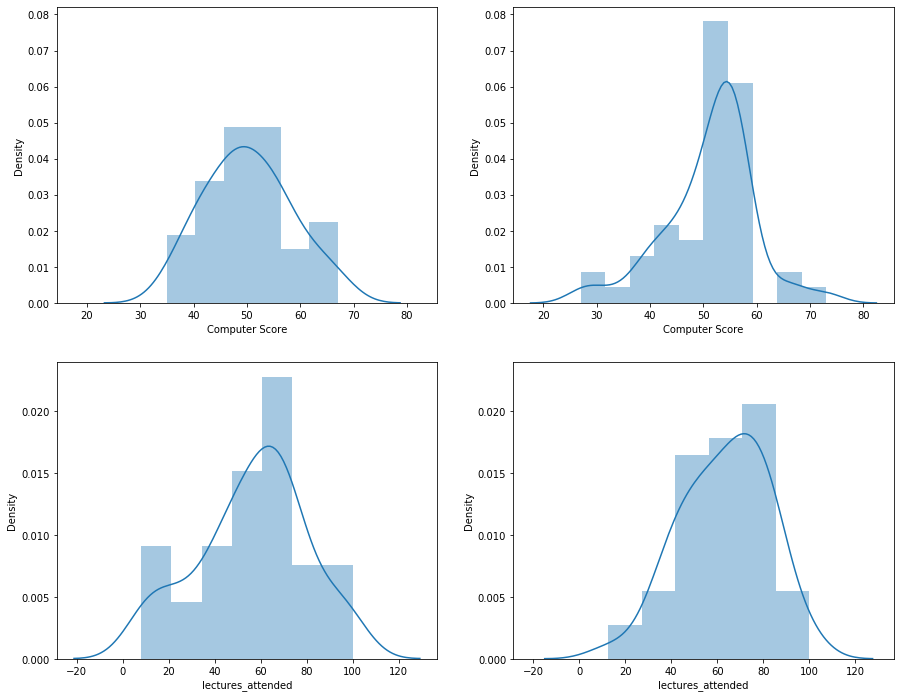

In [53]:
plt.figure(figsize=(15,12))
ax1 = plt.subplot(221)
sns.distplot(Dunce_data['computer'], norm_hist=True)
ax1.set_xlabel('Computer Score')
ax1.set_ylabel('Density')


ax2 = plt.subplot(222,sharex=ax1, sharey=ax1)
sns.distplot(sussex_data['computer'], norm_hist=True)
ax2.set_xlabel('Computer Score')
ax2.set_ylabel('Density')



ax3 = plt.subplot(223)
sns.distplot(Dunce_data['lectures'], norm_hist=True)
ax3.set_xlabel('lectures_attended')
ax3.set_ylabel('Density')


ax4 = plt.subplot(224,sharex=ax3, sharey=ax3)
sns.distplot(sussex_data['lectures'], norm_hist=True)
ax4.set_xlabel('lectures_attended')
ax4.set_ylabel('Density')


plt.show()

In [54]:
print(Dunce_data[['computer', 'lectures']].describe())
print(sussex_data[['computer', 'lectures']].describe())

        computer   lectures
count  50.000000   50.00000
mean   50.260000   56.26000
std     8.068103   23.77257
min    35.000000    8.00000
25%    44.250000   43.75000
50%    49.000000   60.50000
75%    55.750000   70.87500
max    67.000000  100.00000
        computer    lectures
count  50.000000   50.000000
mean   51.160000   63.270000
std     8.505364   18.969688
min    27.000000   12.500000
25%    47.250000   49.125000
50%    54.000000   65.750000
75%    56.000000   78.000000
max    73.000000  100.000000


## performing shapiro-wilk test

In [55]:
sp.shapiro(university_data['exam'])

(0.9613097906112671, 0.004991333466023207)

In [56]:
sp.shapiro(university_data['numeracy'])

(0.924386739730835, 2.4239581762230955e-05)

In [57]:
sp.shapiro(university_data['lectures'])

(0.9769788384437561, 0.07712065428495407)

In [58]:
sp.shapiro(university_data['computer'])

(0.9870546460151672, 0.4413094222545624)

In [59]:
sp.shapiro(Dunce_data['exam'])

(0.9721663594245911, 0.2829025983810425)

In [60]:
sp.shapiro(sussex_data['exam'])

(0.9837116599082947, 0.7151228189468384)

In [61]:
sp.shapiro(Dunce_data['numeracy'])

(0.9408167600631714, 0.014514917507767677)

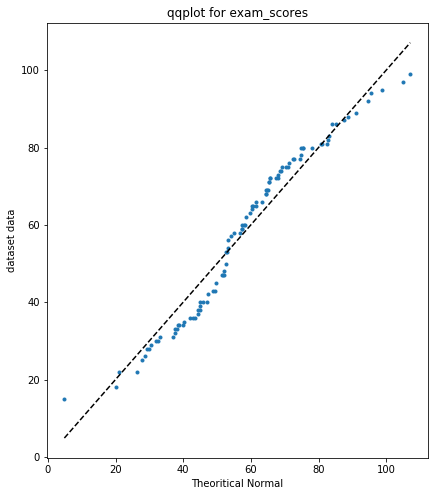

In [62]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)


theoritical = np.random.normal(58.10000, 21.31557, 100)
percs = np.linspace(0,100,100)
qn_b = np.percentile(university_data['exam'], percs)
qn_a = np.percentile(theoritical , percs)


plt.plot(qn_a,qn_b, ls="", marker=".")
ax1 = plt.gca()
ax1.set_xlabel('Theoritical Normal')
ax1.set_ylabel('dataset data')
ax1.set_title('qqplot for exam_scores')
x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

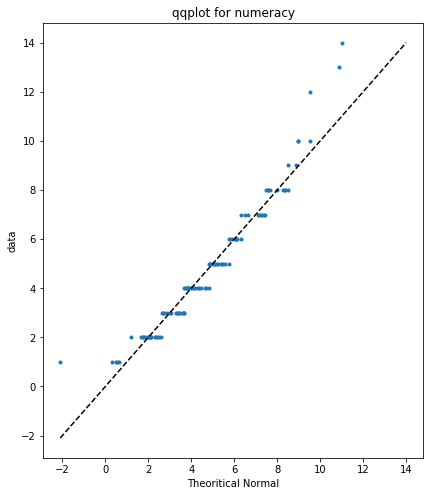

In [63]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)


theoritical = np.random.normal(4.85, 2.705681, 100)
percs = np.linspace(0,100,100)
qn_b = np.percentile(university_data['numeracy'], percs)
qn_a = np.percentile(theoritical , percs)


plt.plot(qn_a,qn_b, ls="", marker=".")
ax1 = plt.gca()
ax1.set_xlabel('Theoritical Normal')
ax1.set_ylabel('data')
ax1.set_title('qqplot for numeracy')
x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

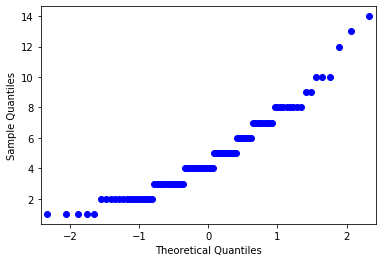

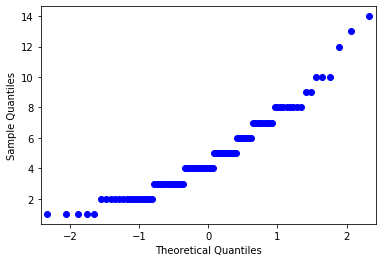

In [69]:
sm.qqplot(university_data['numeracy'])

## Levene Test

#### Testing for homogeneity of variance in groups of Data

Doing Levene Test using scipy.stats.levene


##### i) levene test for exam score b/w Dunce and sussex

In [88]:
sp.levene(Dunce_data['exam'], sussex_data['exam'])

LeveneResult(statistic=2.088557499283053, pvalue=0.15159625694960951)

the pvalue returned is more than 0.05, so this means that variance are not significantly different

ii) levene test for numeracy b/w Dunce and sussex

In [89]:
sp.levene(Dunce_data['numeracy'], sussex_data['numeracy'])

LeveneResult(statistic=5.366045071639426, pvalue=0.022615251034367147)

the pvalue returned is less than 0.05, so this means that variance are  significantly different

### Fmax / Hartley’s Test(Variance Ratio): Definition, Step by Step Example, Table 

As  with  the  Shapiro–Wilk  test  (and  other  tests  of  normality),  when  the  sample  size  is large, small differences in group variances can produce a Levene’s test that is significant (because,  as  we  saw  in  Chapter  1,  the  power  of  the  test  is  improved).  A  useful  double check,  therefore,  is  to  look  at Hartley’s Fmax  –  also  known  as  the variance  ratio(Pearson & Hartley, 1954). 

https://www.statisticshowto.com/fmax-hartleys-test/

#### We are going to do Hartley's test for both exam score and numeracy and see what we can deduce

In [94]:
varince_Dunce_exam = sp.describe(Dunce_data['exam']).variance
varince_Dunce_exam

158.47714285714287

In [96]:
variance_sussex_exam = sp.describe(sussex_data['exam']).variance
variance_sussex_exam

104.14244897959185

In [99]:
Ratio_VarMax_VarMin = varince_Dunce_exam/variance_sussex_exam
Ratio_VarMax_VarMin

1.5217343591391697

we gotta compare number of groups and d.o.f with Hartleys Fmax table and we could see that the variance differnce is non-significant for exam score .

In [100]:
variance_Dunce_num = sp.describe(Dunce_data['numeracy']).variance
variance_Dunce_num

4.271020408163265

In [101]:
variance_sussex_num = sp.describe(sussex_data['numeracy']).variance
variance_sussex_num

9.432244897959183

In [104]:
Ratio_VarMax_VarMin_num = variance_sussex_num/variance_Dunce_num
Ratio_VarMax_VarMin_num

2.208428899082569

we gotta compare number of groups and d.o.f with Hartleys Fmax table and we could see that the variance differnce is significant for numeracy

## Transformations

#### i) Log Transformation

In [116]:
day1['logday1'] = np.log(day1['day1']+1)

In [117]:
day1['logday1'].describe()

count    810.000000
mean       0.984986
std        0.270010
min        0.019803
25%        0.838327
50%        1.026042
75%        1.172482
max        1.545433
Name: logday1, dtype: float64

In [119]:
day1['day1'].describe()

count    810.000000
mean       1.771136
std        0.693539
min        0.020000
25%        1.312500
50%        1.790000
75%        2.230000
max        3.690000
Name: day1, dtype: float64

In [120]:
day2['logday2'] = np.log(day2['day2']+1)

In [121]:
day2['logday2'].describe()

count    264.000000
mean       0.612811
std        0.342367
min        0.000000
25%        0.343590
50%        0.582216
75%        0.854415
max        1.490654
Name: logday2, dtype: float64

In [122]:
day3['logday3'] = np.log(day3['day3']+1)

In [123]:
day3['logday3'].describe()

count    123.000000
mean       0.623075
std        0.336820
min        0.019803
25%        0.364643
50%        0.565314
75%        0.926192
max        1.483875
Name: logday3, dtype: float64

In [125]:
day1['sr1'] = np.sqrt(day1['day1'])
day2['sr2'] = np.sqrt(day2['day2'])
day3['sr3'] = np.sqrt(day3['day3'])

In [129]:
day1['rev'] = 1/(day1['day1']+1)
day2['rev'] = 1/(day2['day2']+1)
day3['rev'] = 1/(day3['day3']+1)

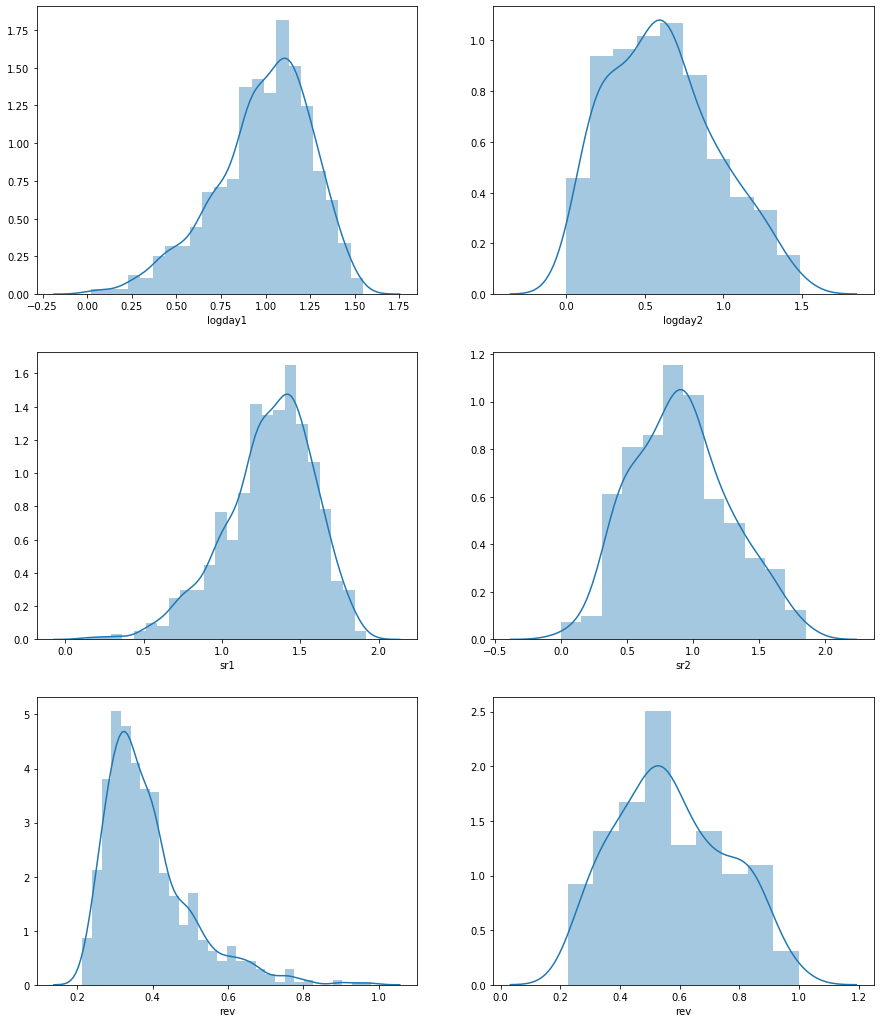

In [130]:
plt.figure(figsize=(15,18))

plt.subplot(321)
_ = sns.distplot(day1['logday1'])

plt.subplot(322)
_ = sns.distplot(day2['logday2'])


plt.subplot(323)
_ = sns.distplot(day1['sr1'])

plt.subplot(324)
_ = sns.distplot(day2['sr2'])

plt.subplot(325)
_ = sns.distplot(day1['rev'])

plt.subplot(326)
_ = sns.distplot(day2['rev'])


plt.show()